In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series

In [20]:
#creating the df from the csv file
df_music = pd.read_csv('musicData.csv')

# creating a new column containing the gender as a numerical value (in case needed), 
# we can avoid adding this new column if it's useless
num_sex=[]
for value in df_music['gender']:
  if value == 'Male':
    num_sex.append(0)
  elif value == 'Female':
    num_sex.append(1)
  else :
    num_sex.append(2)
num_sex_col= pd.Series(num_sex, dtype='int32')
df_music['sex_n']=num_sex_col

#printing the head of the dataframe
df_music.head()

,timestamp,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,song1,...,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,health_categorical,sex_n
0,05/11/2016 14:34:00,Male,18 - 30,1 - 2,4,3,5,3,6,Too Good Drake,...,0.6330,0.655000,0.1100,0.5715,98.3680,0.000025,0.281600,71.500000,1.0,0
1,05/11/2016 14:45:26,Male,18 - 30,1 - 2,6,6,3,5,5,Put that on my set asap rocky ft skepta,...,0.6550,0.526000,0.1160,0.1560,121.1270,0.000000,0.056600,65.000000,1.0,0
2,05/11/2016 14:45:41,Female,18 - 30,0 - 1,5,5,4,4,5,Fireproof Coleman Hell,...,0.7455,0.742000,0.1835,0.6185,125.0090,0.000023,0.053800,63.500000,1.0,1
3,05/11/2016 14:45:55,Male,18 - 30,2+,3,6,5,5,5,Eyes Nose Lips TaeYang,...,0.7390,0.681667,0.1489,0.5960,113.5760,0.000001,0.348867,60.333333,1.0,0
4,05/11/2016 14:49:15,Female,18 - 30,0 - 1,2,5,2,1,5,Sugar Wanderlust,...,0.5390,0.513000,0.2155,0.2915,122.4605,0.464350,0.599500,3.000000,0.0,1


In [21]:
#null values
pd.isnull(df_music).sum()

timestamp             0
gender                0
age                   0
amount_music          0
life_enjoyment        0
resilience            0
balanced_life         0
emotional_flex        0
self_actualization    0
song1                 0
song2                 0
song3                 0
trauma                0
id                    0
total_health          0
energy                5
dance                 5
liveness              5
valence               5
tempo                 5
instrumental          5
acoustic              5
popularity            5
health_categorical    0
sex_n                 0
dtype: int64

In [22]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           235 non-null    object 
 1   gender              235 non-null    object 
 2   age                 235 non-null    object 
 3   amount_music        235 non-null    object 
 4   life_enjoyment      235 non-null    int64  
 5   resilience          235 non-null    int64  
 6   balanced_life       235 non-null    int64  
 7   emotional_flex      235 non-null    int64  
 8   self_actualization  235 non-null    int64  
 9   song1               235 non-null    object 
 10  song2               235 non-null    object 
 11  song3               235 non-null    object 
 12  trauma              235 non-null    object 
 13  id                  235 non-null    int64  
 14  total_health        235 non-null    int64  
 15  energy              230 non-null    float64
 16  dance   

<h2>Descriptive statistics</h2>

In [25]:
df_music.describe().transpose()
#we could make observations about mean, median, standard deviation (?)

,count,mean,std,min,25%,50%,75%,max
life_enjoyment,235.0,3.434043,1.413802,0.000000,3.000000,3.000000,4.000000,6.000000
resilience,235.0,4.017021,1.310594,0.000000,3.000000,4.000000,5.000000,6.000000
balanced_life,235.0,3.629787,1.406322,0.000000,2.500000,4.000000,5.000000,6.000000
emotional_flex,235.0,3.651064,1.529465,0.000000,3.000000,4.000000,5.000000,6.000000
self_actualization,235.0,4.306383,1.355490,0.000000,4.000000,5.000000,5.000000,6.000000
id,235.0,117.000000,67.982841,0.000000,58.500000,117.000000,175.500000,234.000000
total_health,235.0,19.038298,4.715249,6.000000,16.000000,20.000000,22.000000,30.000000
energy,230.0,0.632621,0.140835,0.143000,0.544250,0.640667,0.712167,0.967667
dance,230.0,0.624728,0.120391,0.175000,0.547500,0.637167,0.709500,0.896000
liveness,230.0,0.187970,0.095937,0.068300,0.119208,0.164333,0.221000,0.799000


In [ ]:
#check artist and genres by merging with the csv song_metrics.csv

<h2>Correlation Map</h2>

[Text(0.5, 0, 'life_enjoyment'),
 Text(1.5, 0, 'resilience'),
 Text(2.5, 0, 'balanced_life'),
 Text(3.5, 0, 'emotional_flex'),
 Text(4.5, 0, 'self_actualization'),
 Text(5.5, 0, 'id'),
 Text(6.5, 0, 'total_health'),
 Text(7.5, 0, 'energy'),
 Text(8.5, 0, 'dance'),
 Text(9.5, 0, 'liveness'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'tempo'),
 Text(12.5, 0, 'instrumental'),
 Text(13.5, 0, 'acoustic'),
 Text(14.5, 0, 'popularity'),
 Text(15.5, 0, 'health_categorical'),
 Text(16.5, 0, 'sex_n')]

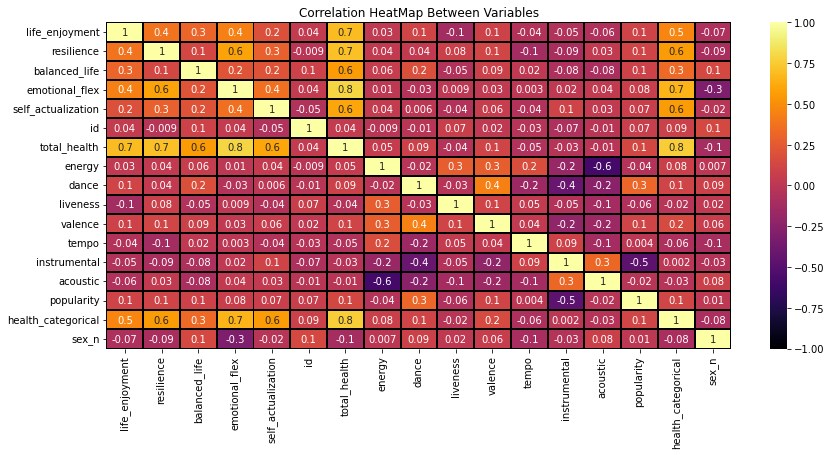

In [27]:
corr_df = df_music.corr(method='pearson')
plt.figure(figsize = (14,6))
heatmap=sns.heatmap(corr_df, annot=True, fmt ='.1g', vmin =-1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title('Correlation HeatMap Between Variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

# Gender was missing because it has not integer/float values - 
# I converted it in numerical values (0= males, 1=female) to include it, don't know if it is correct

[Text(0.5, 1.0, 'Gender vs Instrumental Correlation')]

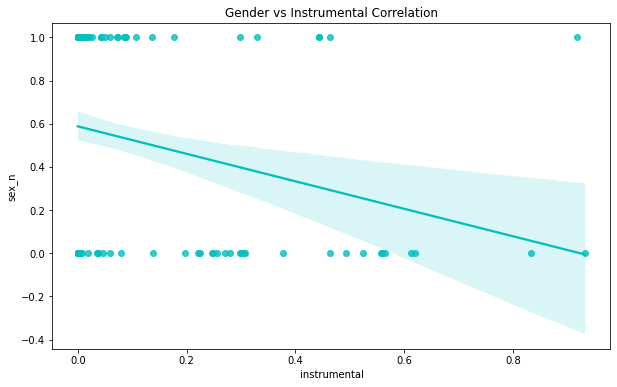

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(data = df_music, y = 'sex_n', x = 'instrumental', color='c').set(title = 'Gender vs Instrumental Correlation')

<h1> Describing the audience of the study</h1>
Here we could try describing interesting patterns but the problem is that we don't have meaningful correlations. Should we include data on genres and artists from other csvs?

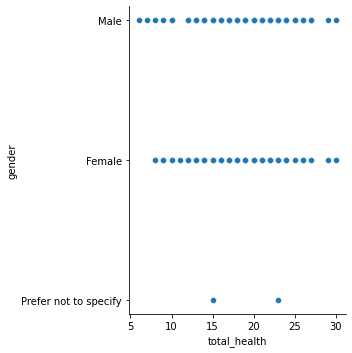

In [35]:
# Create a visualization
sns.relplot(
    data=df_music,
    x="total_health", y="gender")

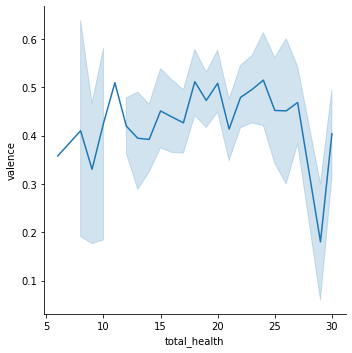

In [40]:

sns.relplot(
    data=df_music, kind="line",
    x="total_health", y="valence"
)


<h1>Analysis of song_metrics.csv file containing more specific songs data</h1>

In [85]:
song_metrics = pd.read_csv('song_metrics.csv')
song_metrics.head()

,Unnamed: 0,id,songs,song,artist,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,genres
0,0,0,Too Good Drake,Too Good,Drake,0.641,0.82,0.102,0.395,117.974,0.000051,0.0662,77.0,"['canadian hip hop', 'canadian pop', 'hip hop'..."
1,1,0,Trust Nobody Selena Gomez Tory Lanez Cashmere Cat,Trust Nobody (feat. Selena Gomez & Tory Lanez),Cashmere Cat,0.625,0.49,0.118,0.748,78.762,0.000000,0.4970,66.0,"['dance pop', 'downtempo', 'edm', 'electropop'..."
2,2,0,Don't Wanna Know Maroon5 Kendrick Lamar,Don't Wanna Know Maroon5 Kendrick Lamar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,Put that on my set asap rocky ft skepta,Put that on my set asap rocky ft skepta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,High rhe beach lana del rey,High rhe beach lana del rey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
#null values
pd.isnull(song_metrics).sum()

Unnamed: 0        0
id                0
songs             0
song              1
artist          110
energy          110
dance           110
liveness        110
valence         110
tempo           110
instrumental    110
acoustic        110
popularity      110
genres          110
dtype: int64

We can notice that we miss information about the **genres** of the songs and about their **artists** for 110 songs, therefore an **integration** of our data with spotify/ musicbrainz data would be useful. 

Furtheremore, we have the genres contained in a list and this makes it difficult to rely on this column for gaining genre data. **Should we rely only on Musicbrainz for the genres?** 

In [87]:
song_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    705 non-null    int64  
 1   id            705 non-null    int64  
 2   songs         705 non-null    object 
 3   song          704 non-null    object 
 4   artist        595 non-null    object 
 5   energy        595 non-null    float64
 6   dance         595 non-null    float64
 7   liveness      595 non-null    float64
 8   valence       595 non-null    float64
 9   tempo         595 non-null    float64
 10  instrumental  595 non-null    float64
 11  acoustic      595 non-null    float64
 12  popularity    595 non-null    float64
 13  genres        595 non-null    object 
dtypes: float64(8), int64(2), object(4)
memory usage: 77.2+ KB


# 10 most popular songs
From the dataframe song_metrics we can obtain the most/less popular songs in our dataset (where the popularity is a value from 0 to 100 gained from Spotify(?))

In [104]:
no_id =song_metrics.drop(['id','Unnamed: 0','songs'], axis=1)
nod=no_id.drop_duplicates()
most_popular=nod.query('popularity>80', inplace=False).sort_values('popularity', ascending = False)
most_popular[:10]

,song,artist,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,genres
310,Psycho (feat. Ty Dolla $ign),Post Malone,0.559,0.739,0.1120,0.439,140.124,0.000000,0.5800,92.0,"['pop', 'rap']"
615,Congratulations,Post Malone,0.804,0.630,0.2530,0.492,123.146,0.000000,0.2150,88.0,"['pop', 'rap']"
56,Closer,The Chainsmokers,0.524,0.748,0.1110,0.661,95.010,0.000000,0.4140,88.0,"['edm', 'electropop', 'pop', 'tropical house']"
82,goosebumps,Travis Scott,0.728,0.841,0.1490,0.430,130.049,0.000000,0.0847,87.0,"['pop', 'pop rap', 'rap']"
654,Photograph,Ed Sheeran,0.379,0.614,0.0986,0.201,107.989,0.000464,0.6070,86.0,['pop']
25,Location,Khalid,0.449,0.736,0.0898,0.326,80.126,0.000162,0.3300,86.0,"['indie r&b', 'pop', 'rap']"
526,Thinking Out Loud,Ed Sheeran,0.445,0.781,0.1840,0.591,78.998,0.000000,0.4740,86.0,['pop']
129,That's What I Like,Bruno Mars,0.560,0.853,0.0944,0.860,134.066,0.000000,0.0130,86.0,"['pop', 'post-teen pop']"
133,In The End,Linkin Park,0.853,0.542,0.1080,0.370,105.256,0.000000,0.0103,85.0,"['alternative metal', 'nu metal', 'post-grunge..."
388,Say You Won't Let Go,James Arthur,0.557,0.358,0.0902,0.494,85.043,0.000000,0.6950,85.0,"['dance pop', 'neo mellow', 'pop', 'post-teen ..."


# 10 less popular songs


In [105]:
sorted_df = nod.sort_values('popularity', ascending= True ).head(10)
sorted_df

,song,artist,energy,dance,liveness,valence,tempo,instrumental,acoustic,popularity,genres
440,It Can Happen To You,Chris Smith,0.566,0.800,0.1580,0.674,93.017,0.000297,0.41600,0.0,[]
493,That's Not Me (Karaoke Version) [Originally Pe...,Backing Force,0.776,0.954,0.0716,0.595,138.961,0.666000,0.36000,0.0,[]
218,"Let It Go (From ""Disney: Frozen"")",Melinda Keen,0.447,0.548,0.3660,0.235,136.886,0.000000,0.52300,0.0,[]
512,Yoga (Made Popular By Janelle Monae ft. Jidenn...,Party Tyme Karaoke,0.385,0.779,0.1910,0.540,129.980,0.669000,0.06970,0.0,['karaoke']
12,Sweet Sugar,Wanderlust,0.813,0.302,0.3680,0.339,126.965,0.082700,0.25500,0.0,"['peruvian indie', 'peruvian rock']"
88,Count On Me - Originally By Bruno Mars,Leopard Powered,0.160,0.569,0.1070,0.120,177.961,0.937000,0.97600,0.0,[]
695,If Today Is Your Last Day (In the Style of Nic...,Mr. Entertainer Karaoke,0.497,0.573,0.3540,0.589,90.021,0.032700,0.00001,0.0,['karaoke']
599,Kiss It Better (Originally Performed By Rhianna),Sunfly Karaoke,0.418,0.484,0.0625,0.542,190.237,0.408000,0.00211,1.0,['karaoke']
191,"Don't Wanna Know - 11 Hearts Mix Maroon 5 , Ke...",Amin Cruiser,0.575,0.599,0.0937,0.213,120.913,0.253000,0.66600,1.0,[]
559,Broccolli,XENPÄI,0.309,0.775,0.1090,0.483,112.027,0.000000,0.28300,2.0,[]


# Analysing the popularity variable
We could make further investigations about the most present songs in the dataset and check if our dataset contains more popular or not popular songs

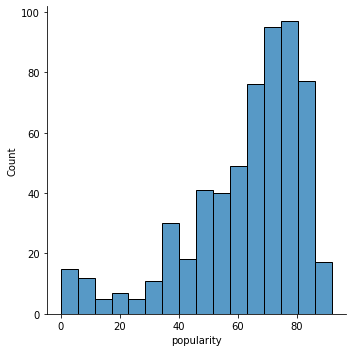

In [106]:
#displot function (DIS for distribution) for visualizing the distribution of the popularity variable
sns.displot(data=song_metrics, x='popularity')

In [110]:
x=song_metrics.query('popularity>50')
len(x)

459

In [111]:
x=song_metrics.query('popularity<50')
len(x)

128

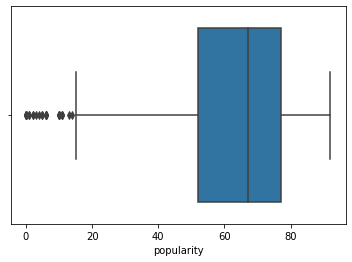

In [114]:
sns.boxplot(data=song_metrics, x='popularity')

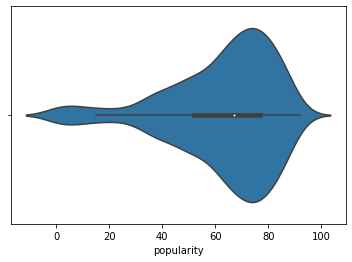

In [115]:
sns.violinplot(data=song_metrics, x='popularity')

We can observe that most of the songs have a medium to high popularity. Should we compare with a general dataset?


# Merging musicData and song_metrics
Could this merge be useful?

In [45]:
#here we merge the 2 dataframes
result = pd.merge(df_music, song_metrics, on="id")
result

,timestamp,gender,age,amount_music,life_enjoyment,resilience,balanced_life,emotional_flex,self_actualization,song1,...,artist,energy_y,dance_y,liveness_y,valence_y,tempo_y,instrumental_y,acoustic_y,popularity_y,genres
0,05/11/2016 14:34:00,Male,18 - 30,1 - 2,4,3,5,3,6,Too Good Drake,...,Drake,0.641,0.820,0.1020,0.395,117.974,0.000051,0.0662,77.0,"['canadian hip hop', 'canadian pop', 'hip hop'..."
1,05/11/2016 14:34:00,Male,18 - 30,1 - 2,4,3,5,3,6,Too Good Drake,...,Cashmere Cat,0.625,0.490,0.1180,0.748,78.762,0.000000,0.4970,66.0,"['dance pop', 'downtempo', 'edm', 'electropop'..."
2,05/11/2016 14:34:00,Male,18 - 30,1 - 2,4,3,5,3,6,Too Good Drake,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05/11/2016 14:45:26,Male,18 - 30,1 - 2,6,6,3,5,5,Put that on my set asap rocky ft skepta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/11/2016 14:45:26,Male,18 - 30,1 - 2,6,6,3,5,5,Put that on my set asap rocky ft skepta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,08/11/2016 19:39:43,Female,18 - 30,2+,0,3,3,1,1,fake love drake,...,Bruno Mars,0.560,0.853,0.0944,0.860,134.066,0.000000,0.0130,86.0,"['pop', 'post-teen pop']"
701,08/11/2016 19:39:43,Female,18 - 30,2+,0,3,3,1,1,fake love drake,...,Beyoncé,0.851,0.621,0.8870,0.449,90.940,0.000015,0.0202,61.0,"['dance pop', 'pop', 'post-teen pop', 'r&b']"
702,12/12/2016 18:59:19,Male,18 - 30,2+,5,5,5,6,6,Crystal Blue Persuasion Tommy James,...,Tommy James & The Shondells,0.313,0.603,0.1840,0.817,99.172,0.000045,0.2480,50.0,"['brill building pop', 'bubblegum pop', 'class..."
703,12/12/2016 18:59:19,Male,18 - 30,2+,5,5,5,6,6,Crystal Blue Persuasion Tommy James,...,Justin Timberlake,0.442,0.574,0.1890,0.467,86.430,0.002900,0.1900,40.0,"['dance pop', 'pop']"
